# Exercise 0

## Strong Scaling Test with wall-clock time

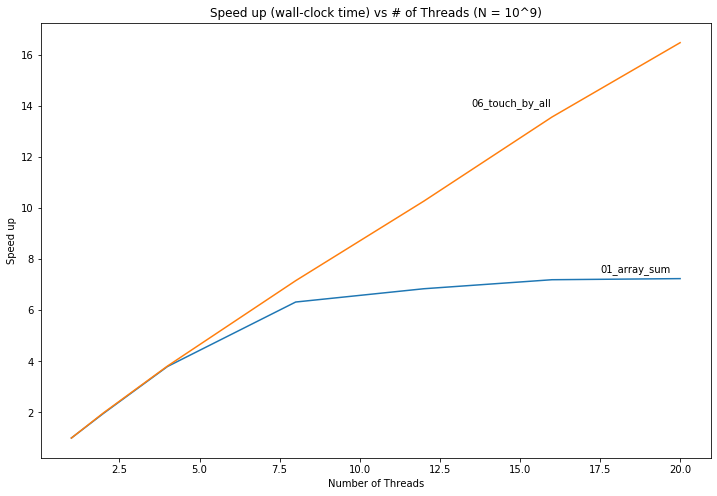

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (wall-clock time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed up")

plt.text(17.5,7.5,'01_array_sum',fontsize = 10)
plt.text(13.5,14,'06_touch_by_all',fontsize = 10)
output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:
    
    f = open(j, "r")
    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))
    plt.plot(number_of_processors,liste[0] / np.array(liste))

## Strong Scaling Test with elapsed time

1 threads run has elapsed time:  6.93
2 threads run has elapsed time:  5.7
4 threads run has elapsed time:  5.11
8 threads run has elapsed time:  4.88
12 threads run has elapsed time:  4.85
16 threads run has elapsed time:  4.79
20 threads run has elapsed time:  4.79


1 threads run has elapsed time:  5.87
2 threads run has elapsed time:  2.98
4 threads run has elapsed time:  1.55
8 threads run has elapsed time:  0.84
12 threads run has elapsed time:  0.59
16 threads run has elapsed time:  0.5
20 threads run has elapsed time:  0.47




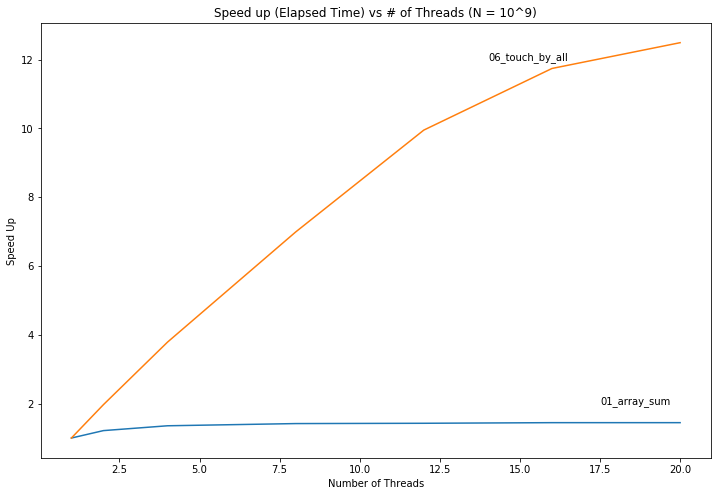

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")

plt.text(17.5,2,'01_array_sum',fontsize = 10)
plt.text(14,12,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                print(number_of_processors[proc], "threads run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                print(number_of_processors[proc], "threads run has elapsed time: "
                      ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    print("\n")
    #print(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
    plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))


## Measure the overhead

Serial Fraction 01_array_sum_output.txt [0.0194023  0.01772897 0.03797658 0.0685936  0.08164212 0.09285036]
Serial Fraction 06_touch_by_all_output.txt [0.0085131  0.016026   0.0168877  0.01535849 0.01201926 0.01130292]


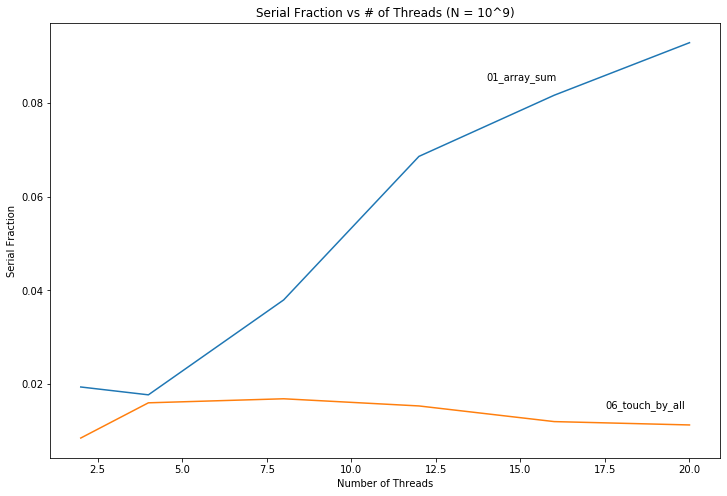

In [3]:
import os
import numpy as np

plt.figure(figsize = (12,8))
plt.title("Serial Fraction vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Serial Fraction")

plt.text(14,0.085,'01_array_sum',fontsize = 10)
plt.text(17.5,0.015,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

number_of_processors = [1,2,4,8,12,16,20]

for j in output_files:
    
    f = open(j, "r")

    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))

    Ts = liste[0]
    Tp = np.array(liste[1:])
    Sp = Ts/Tp
    p = number_of_processors[1:]
    enp = (1/Sp - 1/np.array(p)) / (1 - 1 / np.array(p))
    print("Serial Fraction",f.name,enp)    

    plt.plot(p,enp)

Serial Fraction 01_array_sum_output.txt [0.64502165 0.64983165 0.66192538 0.67256985 0.67061087 0.67494494]
Serial Fraction 06_touch_by_all_output.txt [0.0153322  0.01873935 0.0206863  0.01873935 0.0241908  0.03165068]


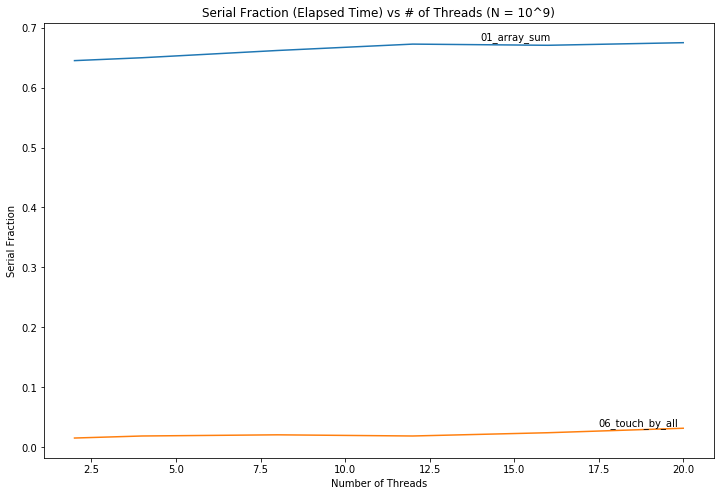

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Serial Fraction (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Serial Fraction")

plt.text(14,0.68,'01_array_sum',fontsize = 10)
plt.text(17.5,0.035,'06_touch_by_all',fontsize = 10)


output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    
    Ts = elapsed_list[0]
    Tp = np.array(elapsed_list[1:])
    Sp = Ts/Tp
    p = number_of_processors[1:]
    enp = (1/Sp - 1/np.array(p)) / (1 - 1 / np.array(p))
    print("Serial Fraction",f.name,enp)
    plt.plot(p,enp)


According to serial fraction calculations change (increasing means lack of scaling is also due to the parallelization overhead) on the other hand if it is stable lack of scaling is due to the serial workload

In order to measure estimated overhead for the codes, I have used general formula, overhead function $T_o = p \times T_p-T_S$ [reference (page 2)](https://www8.cs.umu.se/kurser/5DV050/VT11/F1b.pdf)

Overhead for 01_array_sum_output.txt [0.       0.0489   0.134048 0.669992 1.901656 3.086464 4.44624 ]
Overhead for 06_touch_by_all_output.txt [0.       0.02146  0.121196 0.297996 0.425876 0.454476 0.54136 ]


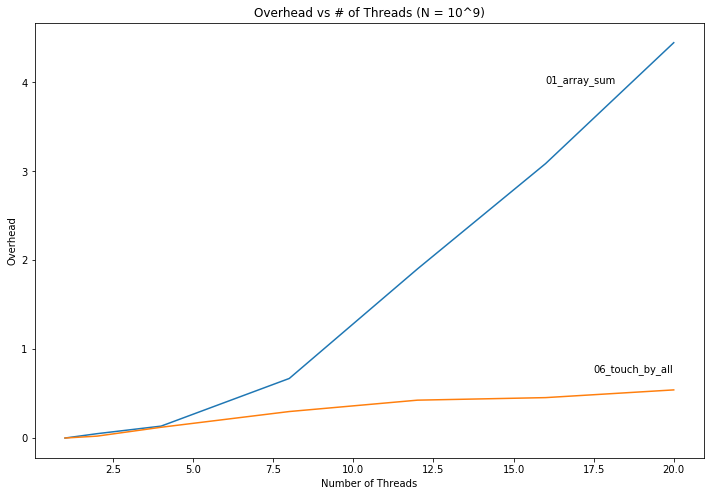

In [5]:
import os
import numpy as np

plt.figure(figsize = (12,8))
plt.title("Overhead vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead")

plt.text(16,4,'01_array_sum',fontsize = 10)
plt.text(17.5,0.75,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

number_of_processors = [1,2,4,8,12,16,20]

for j in output_files:
    
    f = open(j, "r")

    liste = []
    for i in f.readlines():
        if i.startswith("Sum"):
            #print(i[i.index("took")+5:i.index("of")])
            liste.append(float(i[i.index("took")+5:i.index("of")]))

    Ts = liste[0]
    Tp = np.array(liste)
    p = number_of_processors
    To = p * Tp - Ts
    print("Overhead for",f.name,To)    

    plt.plot(p,To)

Overhead for 01_array_sum_output.txt [ 0.    4.47 13.51 32.11 51.27 69.71 88.87]
Overhead for 06_touch_by_all_output.txt [0.   0.09 0.33 0.85 1.21 2.13 3.53]


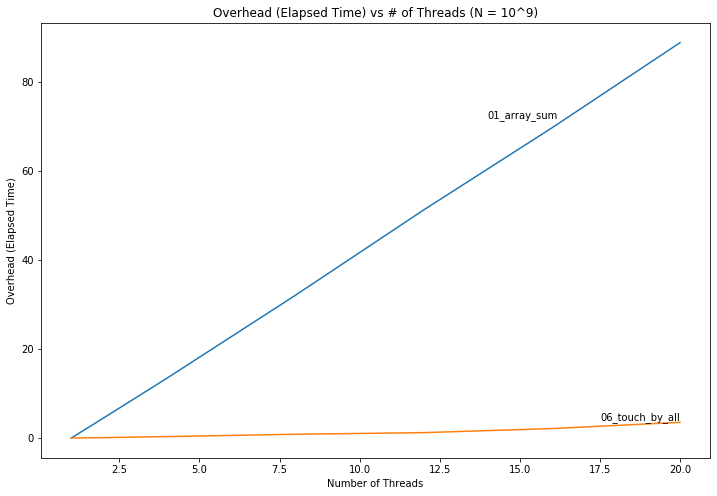

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Overhead (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead (Elapsed Time)")

plt.text(14,72,'01_array_sum',fontsize = 10)
plt.text(17.5,4,'06_touch_by_all',fontsize = 10)

output_files = [i for i in os.listdir() if i[0]=='0']

for j in output_files:

    f = open(j, "r")

    proc = 0
    elapsed_list = []
    for i in f.readlines():
        if "elapsed" in i:
            if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
                #print(i[i.index("elapsed")-5:i.index("elapsed")])
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
                proc+=1
            else:
                min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
                elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                #print(number_of_processors[proc], "threads run has elapsed time: "
                      #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
                proc+=1
    
    Ts = elapsed_list[0]
    Tp = np.array(elapsed_list)
    p = number_of_processors
    To = p * Tp - Ts
    print("Overhead for",f.name, To)
    plt.plot(p,To)


As it can be understood from above plots, touch_by_all method is more efficient than touch_first method. In other words touch by all method scale better with increasing number of computation units unlike touch_first method which is not scaling at all. Also, in terms of overhead with the increasing number of computation units for touch_first method increase so this situation shows us touch_by_all method is more efficient than touch_first method. In order to understand this difference, deeper analyze must be performed. According to this context these codes will be profilied by using perf.

## Profiling Codes

In order to specify difference between two codes, I have used perf to profile codes (collecting hardware, software events). There is no significant difference between two codes. In order to get statistically significant results data collection repeated 10 times. Results are from Ulysses (20 threads)

![Perf Results](perf_stat.png)

Since there is no significant difference between two codes. Chosen events and small differences will be explained.

Best case for cpu-cycle and instructions must be  multiple instructions are executed in a single cycle so in terms of instruction per cycle touch by all policy is bit better than touch by first but there is no big difference. Actually both codes don't perform well about these events. One reason can be compiling without optimization. 

In terms of cache misses results for both code is similar even touch by first is bit better than touch by all. It seems that both codes don't perform well about cache so it cause execution delays by requiring the program to fetch the data from other cache level

Branch instructions and misses are more or less same for each codes and it looks efficient.

The cycles stalled in the front-end are waste because front-end doesn't feed the back-end but for these two code percentage is more or less same

Task clock shows time spent on the profiled task. So in this context we can say that touch by all policy is way better than touch by first since utilizaiton of CPU (with 20 threads) in other words parallelization of touch by all (usage of threads) are more efficient than touch by first.

# Exercise 1

I tried to openmpize serial application of monte carlo pi. After few trials and modifications I got better times than serial one. 
During development process generating random numbers were bit hard, first I applied standard routines but estimations of pi was terrible. That is why I changed the way and with the help of Appendix 1 and some google search (drand48_r function requires structure) I could obtain better code. Also opening regular parallel regions (without specifying private, shared) doesn't give better results than the serial one. **(More explanation on this part)**

*Refer the code openmp_pi.c*

## Weak and Strong Scalability

### Strong Scalability

Since elapsed time and walltime is more or less same, for this tests I'll only use one of them.

1 threads run has elapsed time:  19.55
2 threads run has elapsed time:  9.01
4 threads run has elapsed time:  4.61
8 threads run has elapsed time:  2.44
12 threads run has elapsed time:  1.72
16 threads run has elapsed time:  1.29
20 threads run has elapsed time:  1.32


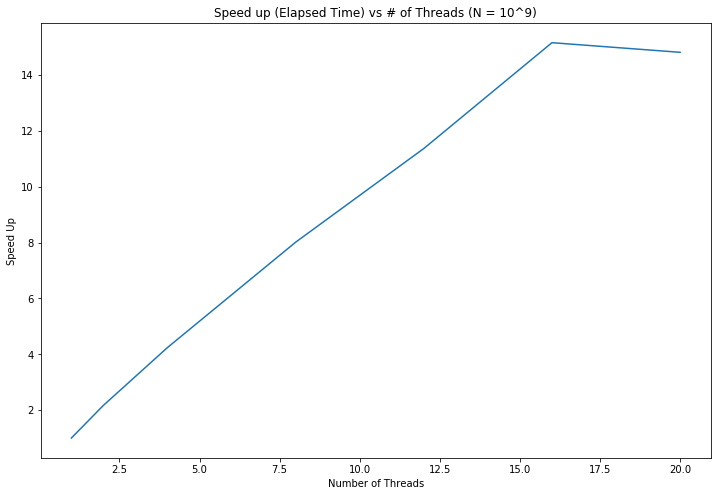

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")

f = open("strong_scaling_output.txt","r")

proc = 0
elapsed_list = []

for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "threads run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "threads run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1
#print("\n")
#print(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))

### Weak Scaling

2 cores run has elapsed time:  17.95
4 cores run has elapsed time:  18.45
8 cores run has elapsed time:  19.58
12 cores run has elapsed time:  20.61
16 cores run has elapsed time:  20.6
20 cores run has elapsed time:  20.61


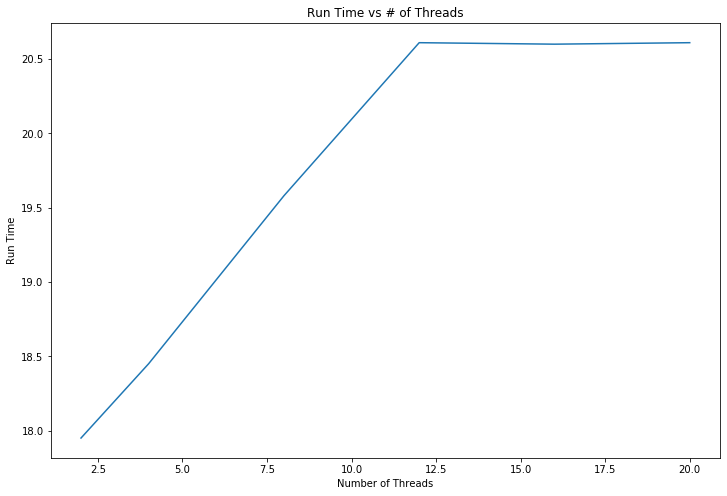

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [2,4,8,12,16,20]

f_weak = open("weak_scaling_output.txt", "r")

proc = 0
elapsed_list = []
for i in f_weak.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
            
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1


plt.figure(figsize = (12,8))
plt.title("Run Time vs # of Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Run Time")
plt.plot(number_of_processors,elapsed_list)

plt.show()

According to logic of weak scalability when we increase the number of cores with the N run time
supposed to be same. However for this example there are small differences. There might be some
room for optimizaiton of parallelization part. But after 12 threads run time became more or less constant which is good. 

### Parallel Overhead

Serial Fraction strong_scaling_output.txt [-0.07826087 -0.01892583 -0.00021922  0.00506859  0.00371697  0.01844124]


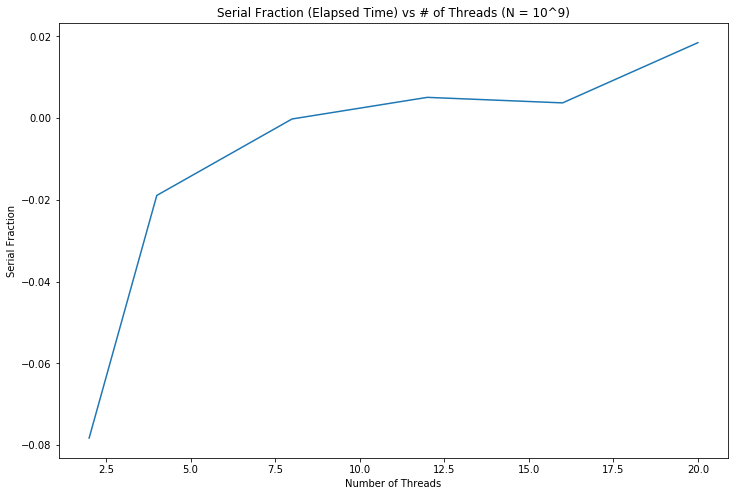

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Serial Fraction (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Serial Fraction")


f = open("strong_scaling_output.txt", "r")

proc = 0
elapsed_list = []
for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1

Ts = elapsed_list[0]
Tp = np.array(elapsed_list[1:])
Sp = Ts/Tp
p = number_of_processors[1:]
enp = (1/Sp - 1/np.array(p)) / (1 - 1 / np.array(p))
print("Serial Fraction",f.name,enp)
plt.plot(p,enp)


Overhead for strong_scaling_output.txt [ 0.   -1.53 -1.11 -0.03  1.09  1.09  6.85]


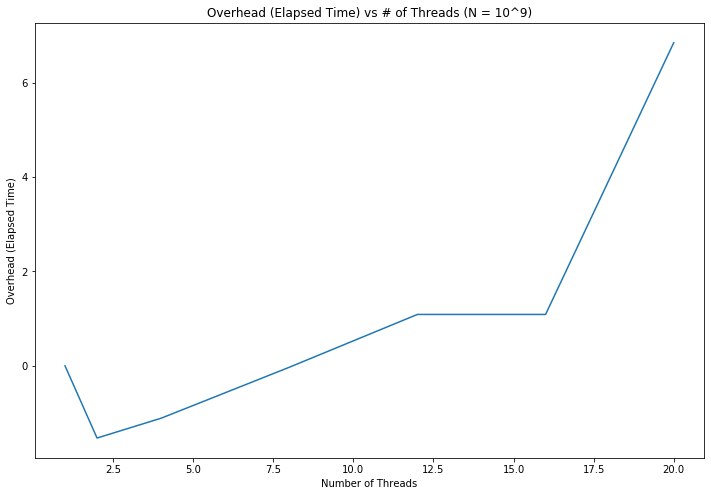

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Overhead (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Overhead (Elapsed Time)")


f = open("strong_scaling_output.txt", "r")

proc = 0
elapsed_list = []
for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            #print(number_of_processors[proc], "threads run has elapsed time: "
                  #,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1

Ts = elapsed_list[0]
Tp = np.array(elapsed_list)
p = number_of_processors
To = p * Tp - Ts
print("Overhead for",f.name, To)
plt.plot(p,To)


### Comparing with OpenMPI

In order the compare mpi approach and openmp approach, I testes the runtime of mpi program and tested the strong scaling

1 cores run has elapsed time:  21.44
2 cores run has elapsed time:  11.74
4 cores run has elapsed time:  6.67
8 cores run has elapsed time:  4.31
12 cores run has elapsed time:  3.64
16 cores run has elapsed time:  3.14
20 cores run has elapsed time:  2.98
[1.         1.82623509 3.2143928  4.97447796 5.89010989 6.82802548
 7.19463087]


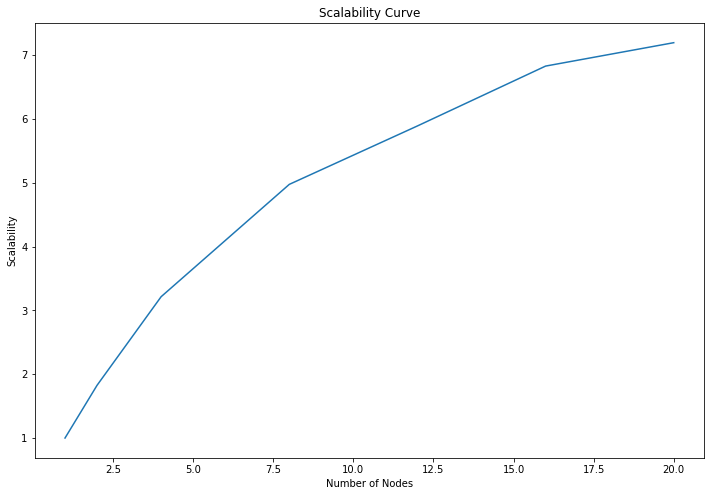

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]


plt.figure(figsize = (12,8))
plt.title("Scalability Curve")
plt.xlabel("Number of Nodes")
plt.ylabel("Scalability")
    
f = open("strong_scaling_mpi_output.txt", "r")

proc = 0
elapsed_list = []
for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1
plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
print(elapsed_list[0]/np.array(elapsed_list))
    

In [12]:
elapsed_list

[21.44, 11.74, 6.67, 4.31, 3.64, 3.14, 2.98]

In [13]:
#Scalability of Openmp
elapsed_list[0]/np.array(elapsed_list)

array([1.        , 1.82623509, 3.2143928 , 4.97447796, 5.89010989,
       6.82802548, 7.19463087])

According to this comparasion, in single node openmp performs bettern than mpi paradigm. Scalability and run time is better than mpi paradigm. 

### Multiple Node Comprasion

1 cores run has elapsed time:  21.73
2 cores run has elapsed time:  11.8
4 cores run has elapsed time:  6.73
8 cores run has elapsed time:  4.39
12 cores run has elapsed time:  3.62
16 cores run has elapsed time:  3.27
20 cores run has elapsed time:  3.03
[1.         1.84152542 3.22882615 4.9498861  6.00276243 6.64525994
 7.17161716]


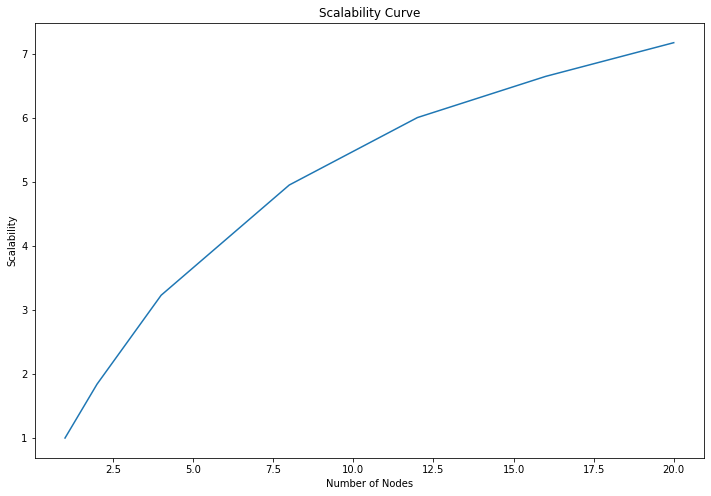

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]


plt.figure(figsize = (12,8))
plt.title("Scalability Curve")
plt.xlabel("Number of Nodes")
plt.ylabel("Scalability")
    
f = open("strong_scaling_mpi_output_2node.txt", "r")

proc = 0
elapsed_list = []
for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "cores run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1
plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
print(elapsed_list[0]/np.array(elapsed_list))
    

1 threads run has elapsed time:  24.62
2 threads run has elapsed time:  8.99
4 threads run has elapsed time:  4.62
8 threads run has elapsed time:  2.47
12 threads run has elapsed time:  1.72
16 threads run has elapsed time:  1.29
20 threads run has elapsed time:  1.03


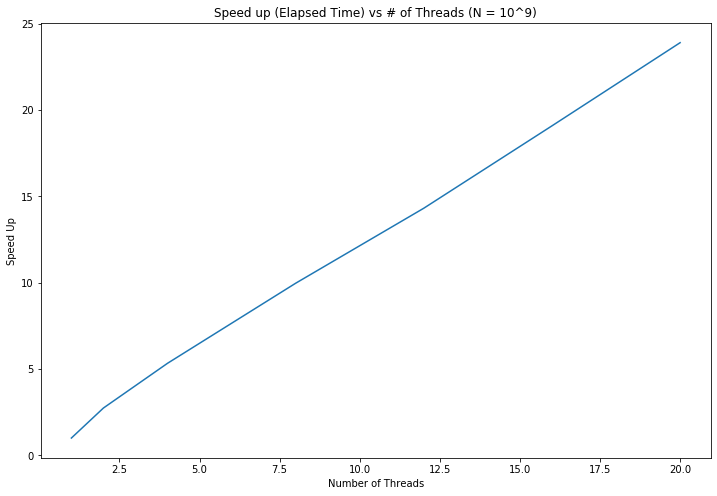

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_of_processors = [1,2,4,8,12,16,20]

plt.figure(figsize = (12,8))
plt.title("Speed up (Elapsed Time) vs # of Threads (N = 10^9)")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")

f = open("strong_scaling_output_2node.txt","r")

proc = 0
elapsed_list = []

for i in f.readlines():
    if "elapsed" in i:
        if i[i.index("elapsed")-7:i.index("elapsed")-6] == "0": # ensuring elapsed time is not in minutes
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]))
            #print(i[i.index("elapsed")-5:i.index("elapsed")])
            print(number_of_processors[proc], "threads run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]))
            proc+=1
        else:
            min_to_sec = float(i[i.index("elapsed")-7:i.index("elapsed")-6]) * 60
            elapsed_list.append(float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            print(number_of_processors[proc], "threads run has elapsed time: "
                  ,float(i[i.index("elapsed")-5:i.index("elapsed")]) + min_to_sec)
            proc+=1
#print("\n")
#print(number_of_processors,elapsed_list[0]/np.array(elapsed_list))
plt.plot(number_of_processors,elapsed_list[0]/np.array(elapsed_list))

**Yapılacaklar:**

    --Kıyaslamalar tek plot üzerinden gösterilecek run-time ve scalability'e dikakt çekilecek
    --Ulyses üzerindne 3-4 node alıp koşumlar o şekilde yapılacak
    --Exercise 0'daki koşumlar tekrarlananacak
    --Yorumun eksik kaldığı kısımlara 3-5 cümle birşey yazılacak
    --Format üzerinde çalışılacak

### Question to ask